## Problem Statement 
Sales teams often lack a clear, data-driven understanding of regional performance, making it difficult to identify growth opportunities and optimize resources. This project aims to analyse and visualize regional sales data to uncover trends, evaluate profitability, and support strategic decision-making.


In [1]:
### importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx",sheet_name= None)

In [4]:
### Assigning dataframes to each sheet
df_sales= sheets['Sales Orders']
df_customers= sheets['Customers']
df_products= sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets= sheets['2017 Budgets']

In [5]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
print("df_sales shape:",(df_sales.shape))
print("df_customers shape:",(df_customers.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape:",(df_regions.shape))
print("df_state_reg shape:",(df_state_reg.shape))
print("df_budgets shape:",(df_budgets.shape))

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [7]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [8]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg= df_state_reg[1:].reset_index(drop= True)

In [9]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [10]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [11]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [12]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [13]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [14]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [15]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

## Data Cleaning And Wrangling

In [16]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [17]:
df_customers.head(1)

,Customer Index,Customer Names
0,1,Geiss Company


#### -Since we have 'customer name index' in sales and 'customer index' in customers....we will merge

In [18]:
 df= df_sales.merge(df_customers, 
                    how='left', 
                    left_on= 'Customer Name Index', 
                    right_on= 'Customer Index')

In [19]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
 df= df.merge(df_products, 
                    how='left', 
                    left_on= 'Product Description Index', 
                    right_on= 'Index')

In [21]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
 df= df.merge(df_regions, 
                    how='left', 
                    left_on= 'Delivery Region Index', 
                    right_on= 'id')

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast


In [26]:
 df= df.merge(df_state_reg, 
                    how='left', 
                    left_on= 'state_code', 
                    right_on= 'State Code')

In [27]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,median_income,land_area,water_area,time_zone,State Code_x,State_x,Region_x,State Code_y,State_y,Region_y
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,GA,Georgia,South,GA,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,CA,California,West,CA,California,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,CT,Connecticut,Northeast


In [28]:
 df= df.merge(df_budgets, 
                    how='left', 
                    left_on= 'Product Name', 
                    right_on= 'Product Name')

In [29]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,land_area,water_area,time_zone,State Code_x,State_x,Region_x,State Code_y,State_y,Region_y,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,268318796,13908113,America/New York,GA,Georgia,South,GA,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,IN,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,62489257,386195,America/Los Angeles,CA,California,West,CA,California,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,IN,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,70972793,720300,America/New York,CT,Connecticut,Northeast,CT,Connecticut,Northeast,1085037.329


In [30]:
df.columns.values

array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index',
       'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'State Code_x', 'State_x',
       'Region_x', 'State Code_y', 'State_y', 'Region_y', '2017 Budgets'],
      dtype=object)

### Keep the important columns and delete the rest

In [36]:
cols_to_keep= ['OrderNumber', 'OrderDate', 'Channel',
        'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost',
       'Customer Names',  'Product Name',  'county',
       'state_code','state','latitude', 'longitude',
       'Region_x', '2017 Budgets']

In [37]:
df= df[cols_to_keep]

In [39]:
df.head(5)

,OrderNumber,OrderDate,Channel,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,county,state_code,state,latitude,longitude,Region_x,2017 Budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,1085037.329


In [41]:

df= df.rename(columns={
              'OrderNumber': 'order_number',
               'OrderDate': 'order_date',
    'Channel': 'channel',
    'Order Quantity': 'order_quantity',
    'Unit Price': 'unit_price',
    'Total Unit Cost': 'total_unit_cost',
    'Customer Names': 'customer_names',
    'Product Name': 'product_name',
    'state_code': 'state_code',
    'county': 'county',
    'state': 'state',
    'Region_x': 'region',
    'latitude': 'latitude',
    'longitude': 'longitude',
    '2017 Budgets': 'budgets',
    'Line Total': 'revenue',})

## Filter Engineering

In [43]:
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state_code,state,latitude,longitude,region,budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,1085037.329


In [44]:
## Blank out the budgets for the non-2017 orders
df.loc[df['order_date'].dt.year != 2017,'budgets']= pd.NA

## Line total is revenue
df[['order_date','product_name','revenue','budgets']].head()

,order_date,product_name,revenue,budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total_unit_cost  64104 non-null  float64       
 7   customer_names   64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state_code       64104 non-null  object        
 11  state            64104 non-null  object        
 12  latitude         64104 non-null  float64       
 13  longitude        64104 non-null  float64       
 14  region           64104 non-null  objec

In [46]:
## Filter the dataset to include only records from year 2017
df_2017= df[df['order_date'].dt.year ==2017]

In [47]:
df.isnull().sum()

order_number           0
order_date             0
channel                0
order_quantity         0
unit_price             0
revenue                0
total_unit_cost        0
customer_names         0
product_name           0
county                 0
state_code             0
state                  0
latitude               0
longitude              0
region                 0
budgets            48841
dtype: int64

In [48]:
df['total_cost'] =df['order_quantity'] * df['total_unit_cost']

In [49]:
df['profit']= df['revenue'] - df['total_cost']

df['profit_margin_pct']= df['profit']/ df['revenue']*100

In [50]:
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state_code,state,latitude,longitude,region,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0


## Exploratory Data Analysis (EDA)

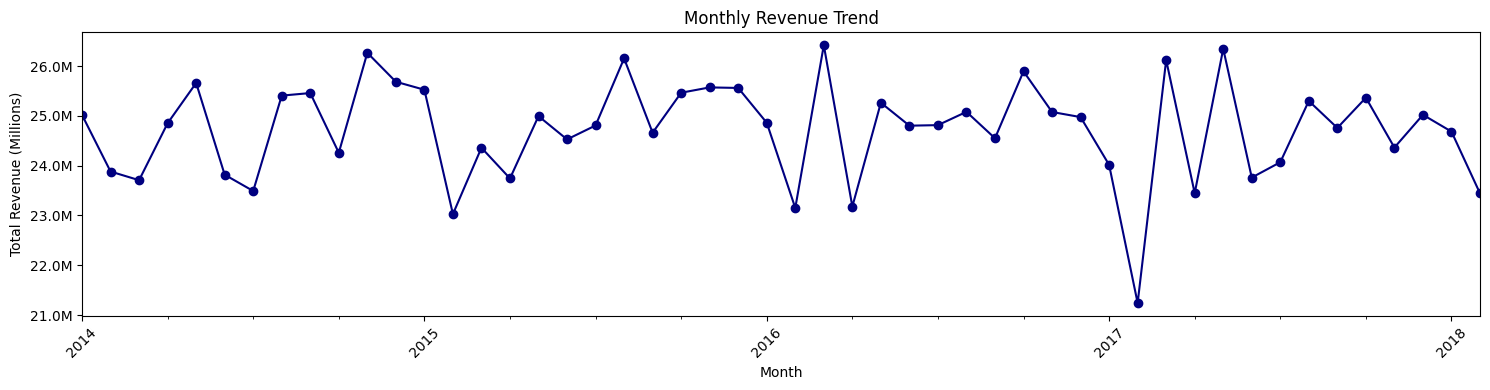

In [51]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales= df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker= 'o', color= 'navy')

from matplotlib.ticker import FuncFormatter
formatter= FuncFormatter( lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

### Since we have incomplete data of 2018 therefore drop the cells for 2018

In [52]:
df['order_date'] = pd.to_datetime(df['order_date'])

df = df[
    ~(
        (df['order_date'].dt.year == 2018) &
        (df['order_date'].dt.month.isin([1, 2]))
     )
]


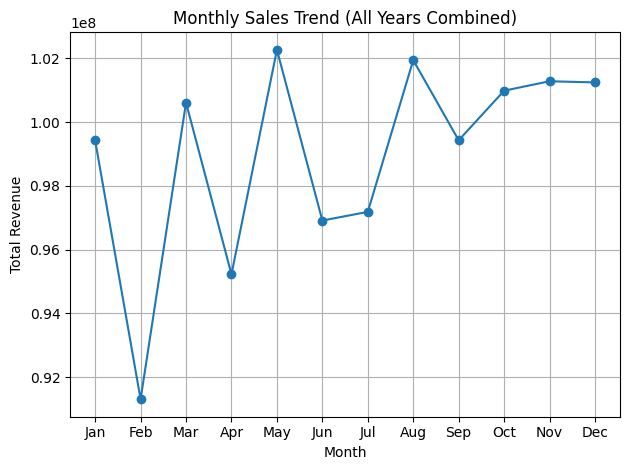

In [53]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract calendar month (1–12)
df['month'] = df['order_date'].dt.month

# Aggregate revenue across ALL years for each month
monthly_sales = (
    df.groupby('month')['revenue']
      .sum()
      .reset_index()
)

# Optional: map month numbers to names for readability
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_sales['month_name'] = monthly_sales['month'].map(month_names)

# Plot monthly sales trend (seasonality)
plt.figure()
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend (All Years Combined)')
plt.grid(True)
plt.tight_layout()
plt.show()


## -May has the highest revenue amongst all months every year 

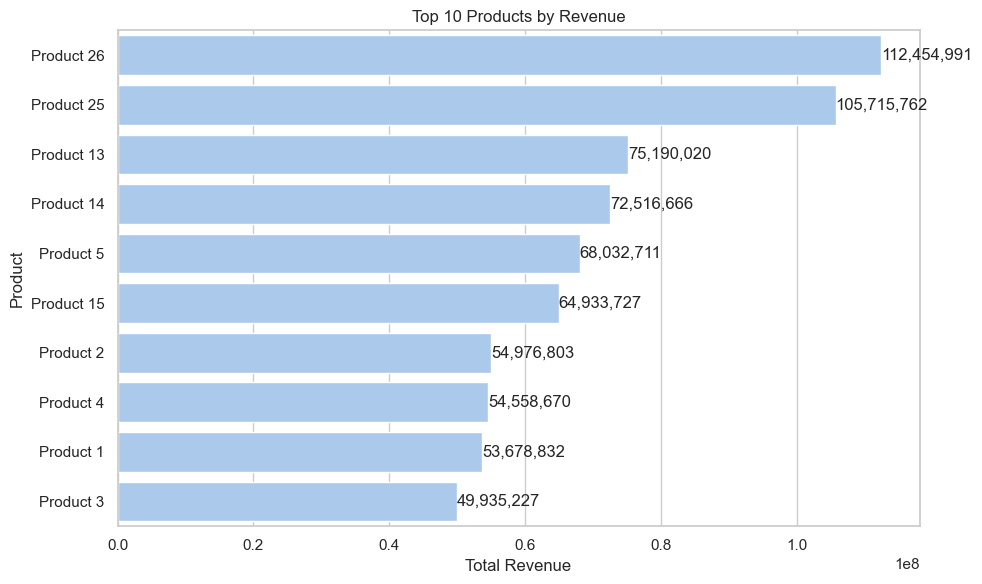

In [54]:

# Step 1: Aggregate revenue by product
product_revenue = (
    df.groupby('product_name', as_index=False)['revenue']
      .sum()
)

# Step 2: Get top 10 products
top_10_products = product_revenue.sort_values(
    by='revenue',
    ascending=False
).head(10)

# Step 3: Plot using seaborn
sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_products,
    x='revenue',
    y='product_name'
)

ax.set_title('Top 10 Products by Revenue')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Product')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():,.0f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center'
    )

plt.tight_layout()
plt.show()


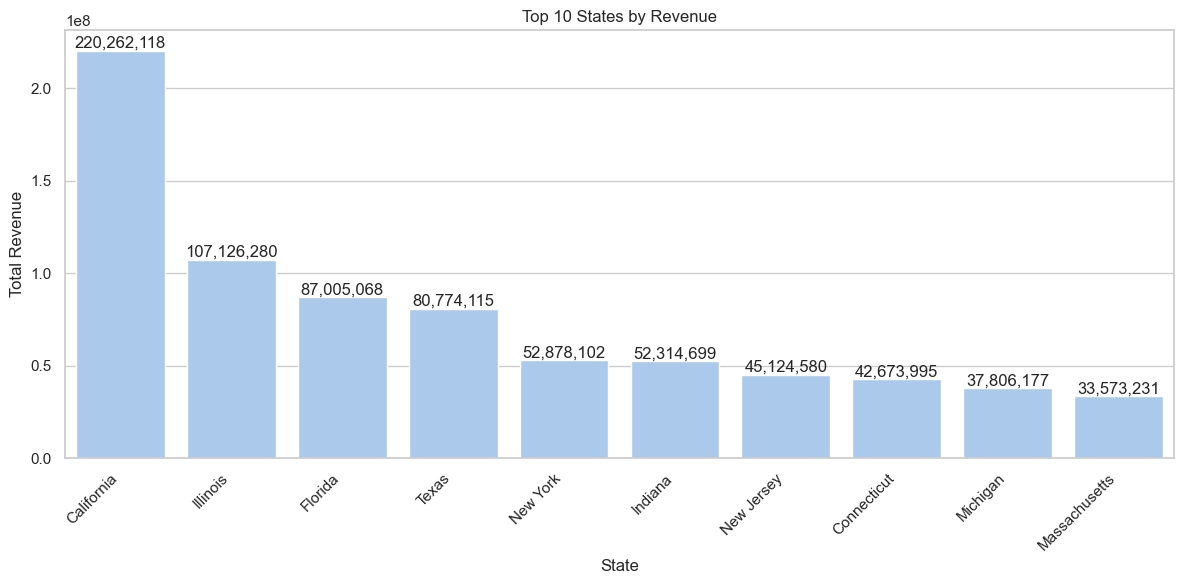

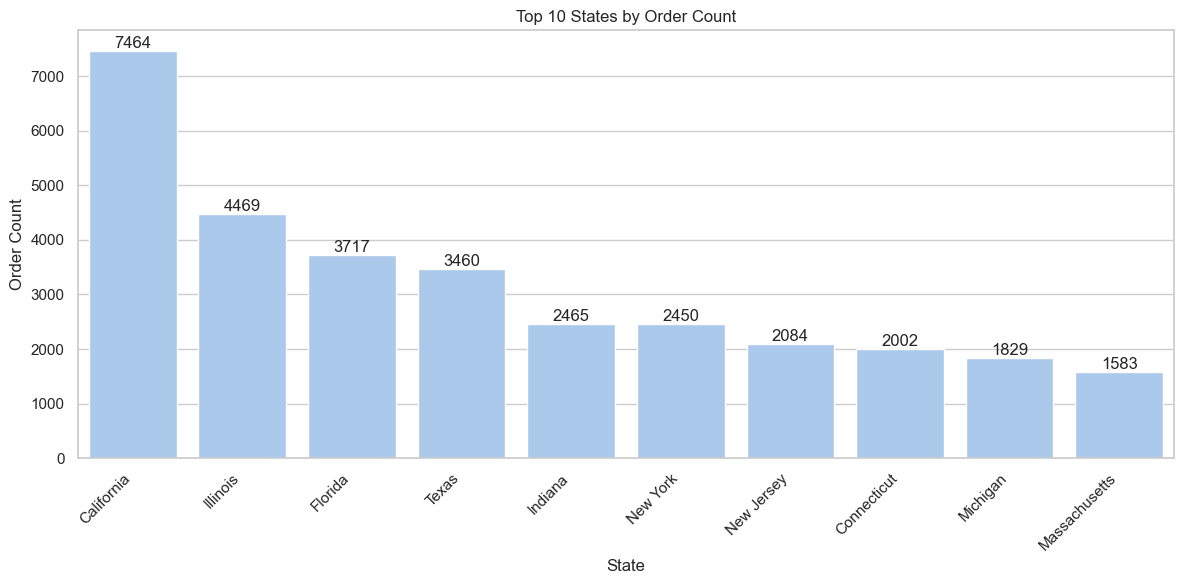

In [62]:
# Aggregate revenue and order count by state
state_summary = (
    df.groupby('state', as_index=False)
      .agg(
          total_revenue=('revenue', 'sum'),
          order_count=('order_number', 'nunique')
      )
)

# Top 10 by revenue
top10_by_revenue = state_summary.sort_values(
    by='total_revenue', ascending=False
).head(10)

# Top 10 by order count
top10_by_orders = state_summary.sort_values(
    by='order_count', ascending=False
).head(10)

sns.set_theme(style='whitegrid', palette='pastel')

# ---------------------------
# Plot 1: Revenue (Vertical Bar)
# ---------------------------
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(
    data=top10_by_revenue,
    x='state',
    y='total_revenue'
)

ax1.set_title('Top 10 States by Revenue')
ax1.set_xlabel('State')
ax1.set_ylabel('Total Revenue')

# Add value labels
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ---------------------------
# Plot 2: Order Count (Vertical Bar)
# ---------------------------
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(
    data=top10_by_orders,
    x='state',
    y='order_count'
)

ax2.set_title('Top 10 States by Order Count')
ax2.set_xlabel('State')
ax2.set_ylabel('Order Count')

# Add value labels
for p in ax2.patches:
    ax2.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


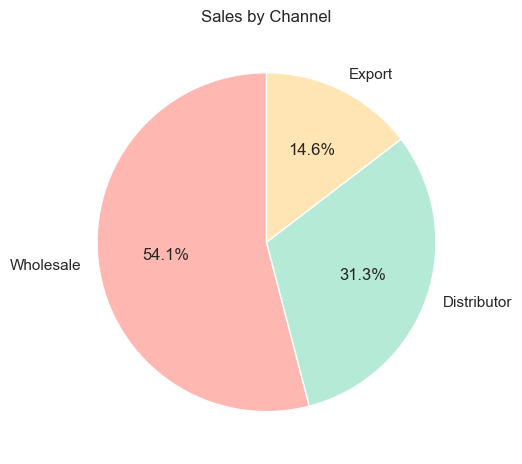

In [47]:


# Aggregate revenue by channel
sales_by_channel = (
    df.groupby('channel')['revenue']
      .sum()
      .sort_values(ascending=False)
)

# Pastel color palette
pastel_colors = [
  
    '#FFB7B2',  # pastel pink
    '#B5EAD7',  # pastel green
    '#FFE5B4',  # pastel peach
    '#C7CEEA',  # pastel lavender
    '#E2F0CB'   # pastel light green (extra if needed)
]

plt.figure()
plt.pie(
    sales_by_channel.values,
    labels=sales_by_channel.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=pastel_colors[:len(sales_by_channel)]
)

plt.title('Sales by Channel')
plt.tight_layout()
plt.show()



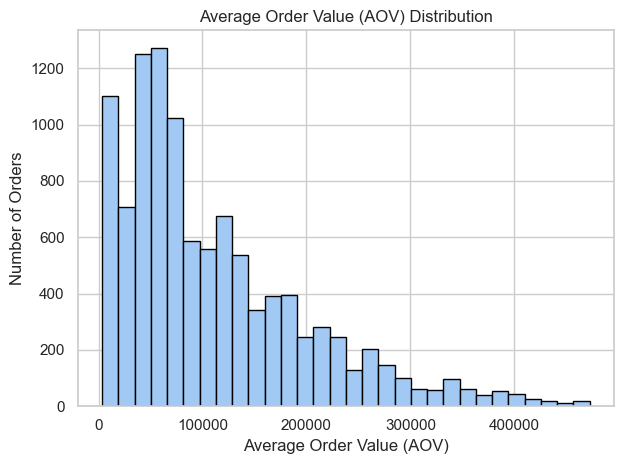

In [48]:
# Aggregate revenue at order level
aov_df = (
    df.groupby('order_number')['revenue']
      .sum()
      .reset_index(name='order_value')
)
plt.figure()

plt.hist(
    aov_df['order_value'],
    bins=30,
    edgecolor='black'
)

plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Number of Orders')
plt.title('Average Order Value (AOV) Distribution')

plt.tight_layout()
plt.show()



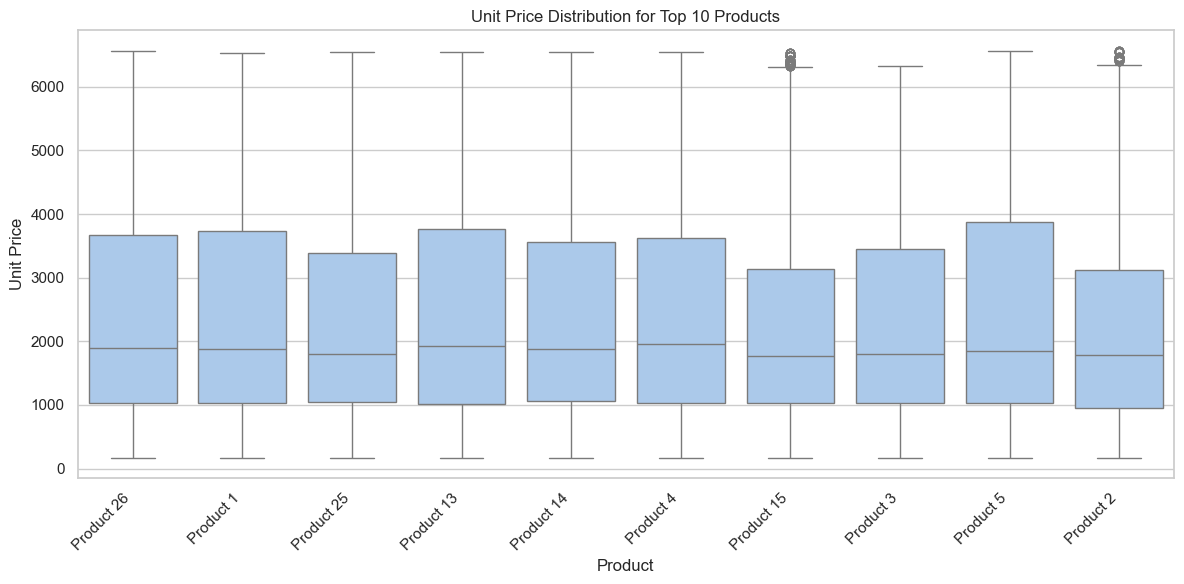

In [49]:
top_10_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)
df_top10 = df[df['product_name'].isin(top_10_products)]
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_top10,
    x='product_name',
    y='unit_price'
)

plt.xlabel('Product')
plt.ylabel('Unit Price')
plt.title('Unit Price Distribution for Top 10 Products')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



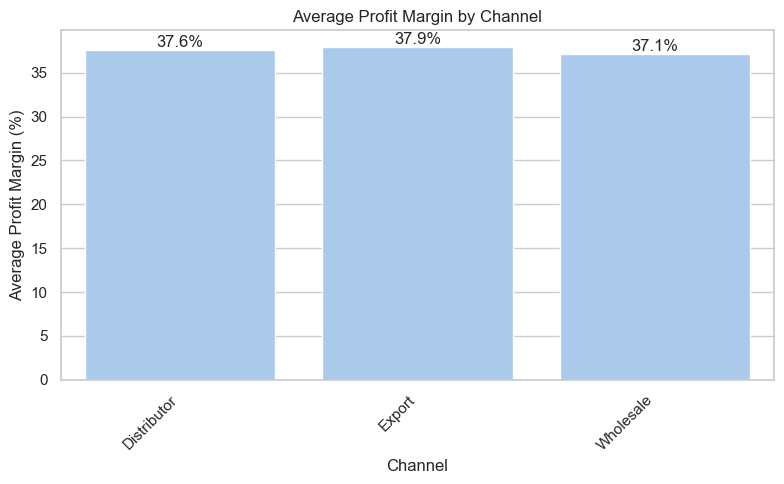

In [50]:
avg_profit_margin = (
    df.groupby('channel', as_index=False)['profit_margin_pct']
      .mean()
)
# Set seaborn theme
sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=avg_profit_margin,
    x='channel',
    y='profit_margin_pct'
)

ax.set_xlabel('Channel')
ax.set_ylabel('Average Profit Margin (%)')
ax.set_title('Average Profit Margin by Channel')

plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f'{value:.1f}%',
        (p.get_x() + p.get_width() / 2, value),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()



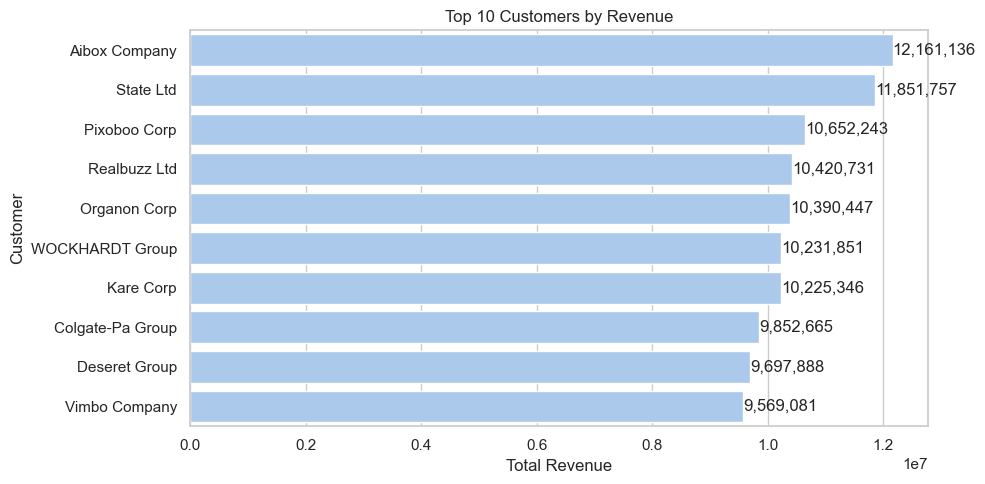

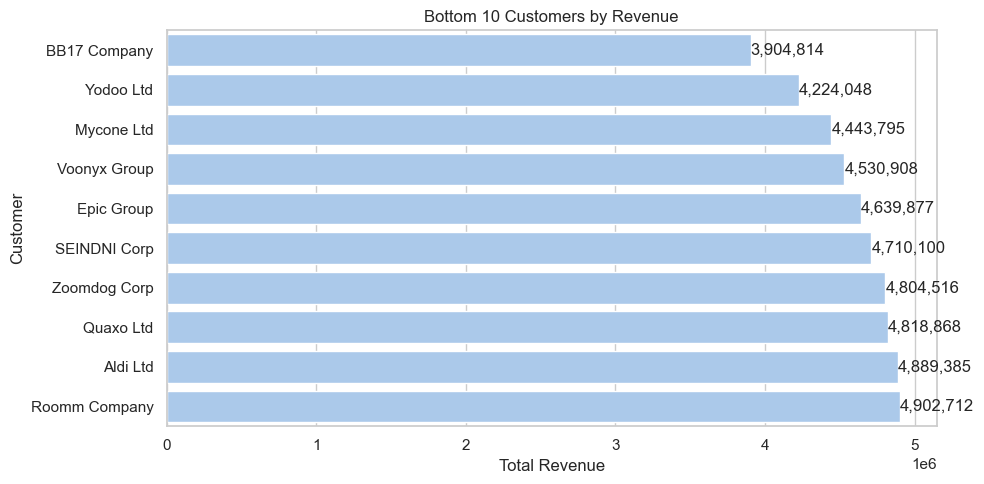

In [51]:
customer_revenue = (
    df.groupby('customer_names', as_index=False)['revenue']
      .sum()
)
top_10_customers = customer_revenue.sort_values(
    by='revenue', ascending=False
).head(10)

bottom_10_customers = customer_revenue.sort_values(
    by='revenue', ascending=True
).head(10)

sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=top_10_customers,
    x='revenue',
    y='customer_names'
)

ax.set_title('Top 10 Customers by Revenue')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

# Value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():,.0f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center'
    )

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=bottom_10_customers,
    x='revenue',
    y='customer_names'
)

ax.set_title('Bottom 10 Customers by Revenue')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

# Value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():,.0f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center'
    )

plt.tight_layout()
plt.show()


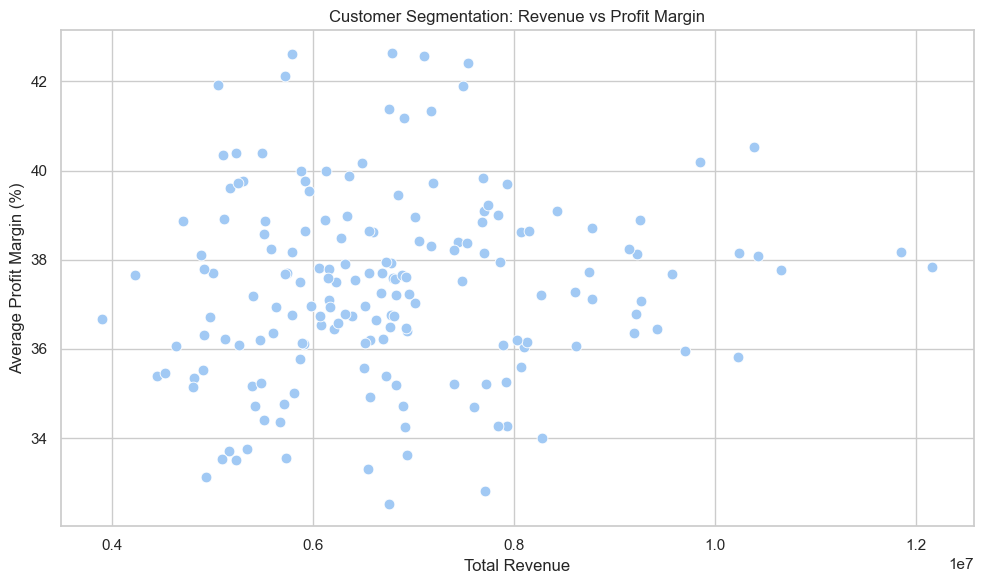

In [52]:
customer_segmentation = (
    df.groupby('customer_names', as_index=False)
      .agg(
          total_revenue=('revenue', 'sum'),
          avg_profit_margin=('profit_margin_pct', 'mean')
      )
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(10, 6))

ax = sns.scatterplot(
    data=customer_segmentation,
    x='total_revenue',
    y='avg_profit_margin',
    s=60
)

ax.set_title('Customer Segmentation: Revenue vs Profit Margin')
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Average Profit Margin (%)')

plt.tight_layout()
plt.show()


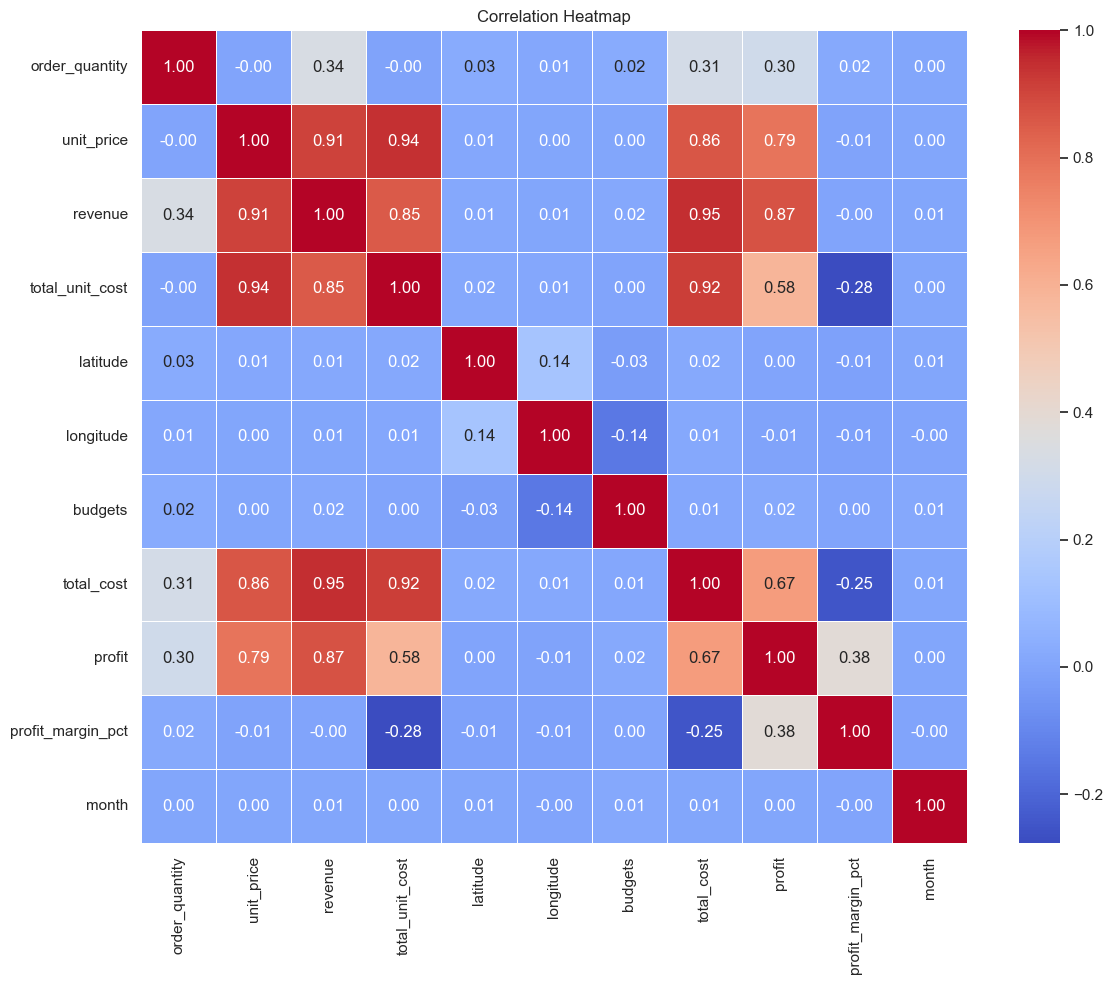

In [53]:
# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

sns.set_theme(style='white')

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



In [63]:
df.to_csv("regional_sales_output.csv", index=False)
